In [84]:
bed_address="depth.regions.bed"
bed_address_out="depth.regions.masked.bed"


bed_file=open(bed_address,'r');

depth_all=[]
all_values=[]
for line in bed_file:
    line_strip=line.strip()
    line_split=line_strip.split("\t")
    
    chrm=int(line_split[0])
    [start, end]=[int(line_split[1]),int(line_split[2])]
    depth=float(line_split[3])
    all_values.append((chrm,start, end,depth))

    depth_all.append(depth)

bed_file.close()



In [85]:
print(len(depth_all))


import numpy as np
from scipy.stats import norm, mode
values= np.array(depth_all)
stat_depth=norm.fit(values[(values > 0) & (values < (2*mode(values[values > 0])[0] ))])
mean_depth=stat_depth[0]
sd_depth=stat_depth[1]

print(mean_depth,sd_depth)


102610
29.75977873207657 6.627264350944628


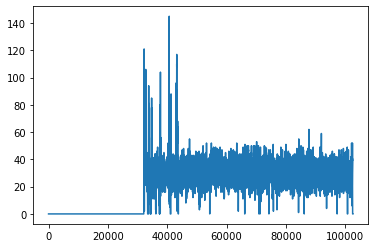

In [86]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.plot(depth_all)
#fig.savefig("test.png")
plt.show()



In [88]:
depth_treshold= mean_depth+3*sd_depth

first=True
for values in all_values:
    [chrm,start, end,depth]=values
    
    if depth> depth_treshold:

        if first:
            first=False
            combined_records=[[start, end]] # no need to report the depth of record
        else:
            last_combined=combined_records[-1]
            end_last_combined= last_combined[1]

            if end_last_combined==start:
                combined_records[-1][1]=end

            else:
                combined_records.append([start, end])


In [106]:
print(len(combined_records)) # high coverage region
[[i/1000,j/1000] for [i,j] in combined_records[:10]]



54


[[16096.5, 16136.0],
 [16160.0, 16168.0],
 [16186.0, 16242.5],
 [16243.0, 16246.0],
 [16279.0, 16321.5],
 [16345.0, 16357.0],
 [16373.5, 16399.0],
 [16433.0, 16452.5],
 [16874.0, 16891.0],
 [16902.0, 16943.0]]

In [127]:
length=[j/1000-i/1000 for [i,j] in combined_records]
mid=[(j+i)/2/1000/1000 for [i,j] in combined_records]
print(length)
print(mid)

[39.5, 8.0, 56.5, 3.0, 42.5, 12.0, 25.5, 19.5, 17.0, 41.0, 6.0, 4.5, 8.0, 43.0, 30.0, 0.5, 4.0, 0.5, 22.0, 18.5, 1.0, 22.0, 25.0, 73.0, 9.5, 23.5, 5.5, 0.5, 2.5, 2.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 0.5, 0.5, 1.5, 0.5, 0.5, 3.0, 0.5, 0.5, 1.5, 1.0, 4.0, 3.5, 0.5, 1.0, 1.5, 0.5, 0.5, 2.0]
[16.11625, 16.164, 16.21425, 16.2445, 16.30025, 16.351, 16.38625, 16.44275, 16.8825, 16.9225, 16.9845, 17.36825, 17.375, 18.776, 18.855, 18.92975, 18.9335, 20.15175, 20.3435, 20.65675, 20.6715, 21.4835, 21.5425, 21.62, 21.69325, 21.76575, 23.76225, 26.04675, 26.62825, 27.444, 27.447, 27.4515, 27.4535, 31.724, 33.111, 33.113, 33.46725, 33.68875, 34.19925, 34.56275, 34.76675, 35.077, 35.37675, 36.37925, 37.86775, 40.014, 42.1815, 42.18575, 42.56325, 43.892, 43.89575, 45.99175, 51.08225, 51.2285]


In [157]:
sum(length)

598.5

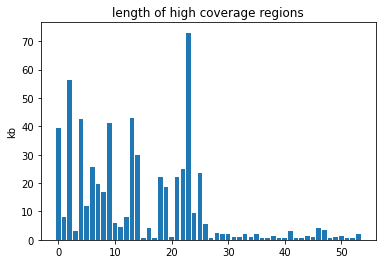

In [124]:

plt.bar(range(len(combined_records)),length)

plt.ylabel("kb")
plt.title("length of high coverage regions")
#plt.show()

plt.savefig("length_highCoverage_barplot.pdf")
#plt.close(fig)    # close the figure window


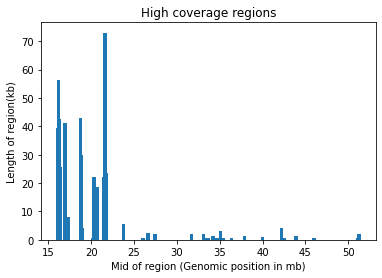

In [132]:
plt.bar(mid,length,width=.4)

plt.ylabel("Length of region(kb)")
plt.xlabel("Mid of region (Genomic position in mb)")

plt.title("High coverage regions")

#plt.show()

plt.savefig("length_highCoverage_barplot_mid.pdf")
plt.savefig("length_highCoverage_barplot_mid.png")

#plt.clos

In [91]:
    
    
bed_file_out=open(bed_address_out[:-3]+"combined.bed",'w');
for records in combined_records:
    line_out= str(chrm)+"\t"+"\t".join([str(records[0]),str(records[1])])
    bed_file_out.write(line_out+"\n")
bed_file_out.close()


In [95]:

bed_address_compare="22_hifi_trio.bed"

bed_file=open(bed_address_compare,'r');
all_switches=[]
for line in bed_file:
    line_strip=line.strip()
    line_split=line_strip.split("\t")
    
    chrm=int(line_split[0])
    [start, end]=[int(line_split[1]),int(line_split[2])]
    all_switches.append([chrm,start, end])
bed_file.close()





In [96]:
len(all_switches)

301

In [97]:
all_switches[1:10]

[[22, 16069374, 16073196],
 [22, 16073196, 16077252],
 [22, 16080579, 16080694],
 [22, 16085591, 16086302],
 [22, 16101186, 16101684],
 [22, 16101684, 16103264],
 [22, 16103264, 16104385],
 [22, 16104385, 16105128],
 [22, 16105128, 16105717]]

In [152]:

counter_start=0
counter_end=0
counter_either=0
counter_region=np.zeros(len(combined_records),dtype=int)

for switch in all_switches:
    [start_switch, end_switch]= switch[1:]

    for idx, record in enumerate(combined_records):
        
        
        [start_interval,end_interval]=record
        
        if start_interval <= start_switch and end_interval >= start_switch:
            counter_start+=1
        if start_interval <= end_switch and end_interval >= end_switch:
            counter_end+=1
       
        if (start_interval <= start_switch and end_interval >= start_switch) or (start_interval <= end_switch and end_interval >= end_switch):
            counter_either+=1
            counter_region[idx]+=1
            #print(start_switch,start_interval,end_interval )
            
        
        

In [153]:
counter_either

96

In [154]:
for idx in range(len(counter_region)):
    print(np.round(mid[idx],1),counter_region[idx])

16.1 15
16.2 3
16.2 19
16.2 0
16.3 3
16.4 0
16.4 3
16.4 1
16.9 2
16.9 2
17.0 1
17.4 0
17.4 0
18.8 17
18.9 8
18.9 0
18.9 0
20.2 0
20.3 2
20.7 1
20.7 0
21.5 3
21.5 5
21.6 10
21.7 1
21.8 0
23.8 0
26.0 0
26.6 0
27.4 0
27.4 0
27.5 0
27.5 0
31.7 0
33.1 0
33.1 0
33.5 0
33.7 0
34.2 0
34.6 0
34.8 0
35.1 0
35.4 0
36.4 0
37.9 0
40.0 0
42.2 0
42.2 0
42.6 0
43.9 0
43.9 0
46.0 0
51.1 0
51.2 0


In [155]:
print(counter_start,counter_end,counter_either, len(all_switches))

90 90 96 301


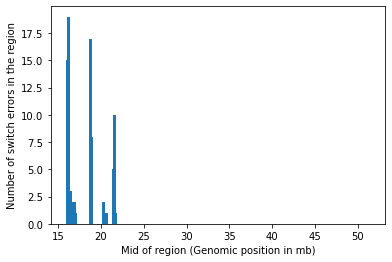

In [156]:
plt.bar(mid,counter_region,width=.4)

plt.ylabel("Number of switch errors in the region")
plt.xlabel("Mid of region (Genomic position in mb)")

#plt.title("High coverage regions")

#plt.show()

#plt.savefig("length_highCoverage_barplot_mid.pdf")
plt.savefig("sw_highCoverage_barplot_mid.png")
